In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
n_clusters = 5

img = cv.imread(r"D:\Opencv\class.vision-master\images\felfel-dolme.jpg")

flat_img = img.reshape((-1, 3))

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(flat_img)

dominent_colors = np.array(kmeans.cluster_centers_, dtype='uint8')
labels = kmeans.labels_

print(dominent_colors)
print(labels)

D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[130 189 227]
 [  2  58  21]
 [  2 179 245]
 [ 28  59 184]
 [ 10 139  77]]
[3 3 3 ... 1 1 1]


In [4]:
percentages = np.bincount(labels)/len(flat_img)
percentages

array([0.02742493, 0.27922887, 0.33710568, 0.21065073, 0.14558979])

In [5]:
p_and_c = zip(percentages, dominent_colors)
p_and_c = sorted(p_and_c, reverse=True)

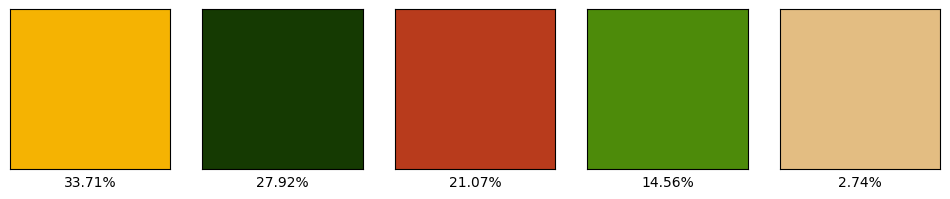

In [6]:
block = np.ones((50,50,3), dtype='uint8')
plt.figure(figsize=[12,8])

for i in range(n_clusters):
    plt.subplot(1, n_clusters, i+1)
    block[:] = p_and_c[i][1][::-1]
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100, 2)) + '%')